#### Importing Libraries



In [51]:
# Ensure transformers library is installed
# load data
import pandas as pd
# data preprocessing
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
# data visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# model building
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
#saving the model
import pickle

### Sentiment Analysis on Amazon Reviews Dataset for Diary Entries

The aim of this project is to perform sentiment analysis on the Amazon reviews dataset for the Daily Journal Sentiment Analysis.The dataset is available on Kaggle. 

##### 1.1 Load Data

Here we will load the data and check the first few rows of the data.

data source: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews


In [ ]:
train_raw_data = pd.read_csv('./train.csv',names=['polarity', 'processed_text', 'text'])
test_raw_data=pd.read_csv('./test.csv',names=['polarity', 'processed_text', 'text'])

##### 1.2 Data Description

View the data description to understand the data better.

In [ ]:
train_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   polarity        int64 
 1   processed_text  object
 2   text            object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [ ]:
test_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   polarity        400000 non-null  int64 
 1   processed_text  399976 non-null  object
 2   text            400000 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


##### 1.3 Data Cleaning


Here the data will be cleaned by removing the unwanted columns and rows. Since the column 2 contains preprocessed text (previous-owner) we will remove them.
The following columns are removed:-
-  2nd Column

In [ ]:
train_raw_data.drop(train_raw_data.columns[1], axis=1, inplace=True)
test_raw_data.drop(test_raw_data.columns[1], axis=1, inplace=True)

a. Remove the rows with missing values.

In [ ]:
train_raw_data.dropna(inplace=True)
test_raw_data.dropna(inplace=True)

b. Remove the duplicate rows.

In [ ]:
train_raw_data.drop_duplicates(inplace=True)
test_raw_data.drop_duplicates(inplace=True)

View the first few rows of the cleaned data.

In [ ]:
train_raw_data.head()

,polarity,text
0,2,This sound track was beautiful! It paints the ...
1,2,I'm reading a lot of reviews saying that this ...
2,2,This soundtrack is my favorite music of all ti...
3,2,I truly like this soundtrack and I enjoy video...
4,2,"If you've played the game, you know how divine..."


Since the data doesn't have any column names, we will assign the column names to the data.

In [ ]:
test_raw_data.head()

,polarity,text
0,2,My lovely Pat has one of the GREAT voices of h...
1,2,Despite the fact that I have only played a sma...
2,1,I bought this charger in Jul 2003 and it worke...
3,2,Check out Maha Energy's website. Their Powerex...
4,2,Reviewed quite a bit of the combo players and ...


In [ ]:
train_raw_data.to_csv('./train_cleaned.csv',index=False)
test_raw_data.to_csv('./test_cleaned.csv',index=False)

##### 1.4 Data Preprocessing

In [18]:
train_cleaned_data = pd.read_csv('./train_cleaned.csv')

View the first few rows of the cleaned data.

In [19]:
train_cleaned_data.head()

,polarity,text
0,2,This sound track was beautiful! It paints the ...
1,2,I'm reading a lot of reviews saying that this ...
2,2,This soundtrack is my favorite music of all ti...
3,2,I truly like this soundtrack and I enjoy video...
4,2,"If you've played the game, you know how divine..."


'text' column is the main column that contains the tweets. We will preprocess the text column by removing the unwanted characters, converting the text to lowercase, and removing the stopwords.

In [20]:
for i in range(5):
    print("Row: ", i)
    print(train_cleaned_data.iloc[i]['text'])

Row:  0
This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
Row:  1
I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.
Row:  2
This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (whic

In the following data we need to replace words like don't with do not before using contractions.fix() function. Since this will help in expanding the contractions properly.The process done below:-
- converting the text to lower case (so that the words are not case sensitive)
- removing the unwanted characters
- removing the stopwords
- expanding the contractions
- lemmatizing the words (converting the words to their base form)
- removing digits

In [17]:
# Define stop words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [44]:

def clean_text(text):
    text = text.lower()
    text = contractions.fix(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    text = ' '.join(text.split())
    return text


In [ ]:

# Apply cleaning to the data
train_cleaned_data['processed_text'] = train_cleaned_data['text'].apply(clean_text)

# Print cleaned data
for i in range(5):
    print("Row: ", i)
    print(train_cleaned_data.iloc[i]['processed_text'])

In [23]:
train_cleaned_data.head()

,polarity,text,processed_text
0,2,This sound track was beautiful! It paints the ...,sound track beautiful paint senery mind well w...
1,2,I'm reading a lot of reviews saying that this ...,reading lot review saying best game soundtrack...
2,2,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hand intense sa...
3,2,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music p...
4,2,"If you've played the game, you know how divine...",played game know divine music every single son...


In [24]:
train_cleaned_data.tail()

,polarity,text,processed_text
3594818,1,The high chair looks great when it first comes...,high chair look great first come box hill impo...
3594819,1,I have used this highchair for 2 kids now and ...,used highchair kid finally decided sell like b...
3594820,1,"We have a small house, and really wanted two o...",small house really wanted two high chair twin ...
3594821,1,not sure what this book is supposed to be. It ...,sure book supposed really rehash old idea carr...
3594822,2,I agree that every American should read this b...,agree every american read book everybody else ...


The machine learning models cannot understand the text data. So, we need to convert the text data into numerical data. We will use the CountVectorizer to convert the text data into numerical data.

In [25]:
labels = train_cleaned_data['polarity'].unique()
labels

array([2, 1])

In [ ]:
# Mapping dictionary
sentiment_mapping = {1:'negative', 2:'positive'}

# Decode the 'sentiment' column using map
train_cleaned_data['polarity_decoded'] = train_cleaned_data['polarity'].map(sentiment_mapping)


In [28]:
train_cleaned_data.head()

,polarity,text,processed_text,polarity_decoded
0,2,This sound track was beautiful! It paints the ...,sound track beautiful paint senery mind well w...,positive
1,2,I'm reading a lot of reviews saying that this ...,reading lot review saying best game soundtrack...,positive
2,2,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hand intense sa...,positive
3,2,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music p...,positive
4,2,"If you've played the game, you know how divine...",played game know divine music every single son...,positive


Saving the preprocessed data into a new csv file.

In [29]:
train_cleaned_data.to_csv('./train_preprocesed.csv',index=False)

##### 1.5 Data Visualization

In [2]:
train_processed_data = pd.read_csv('./train_preprocesed.csv')

Viewing the distribution of the target variable.

Here the polarity column contains 'positive', and 'negative' values. Also the distribution of the target variable is visualized. It is observed that the data is balanced.

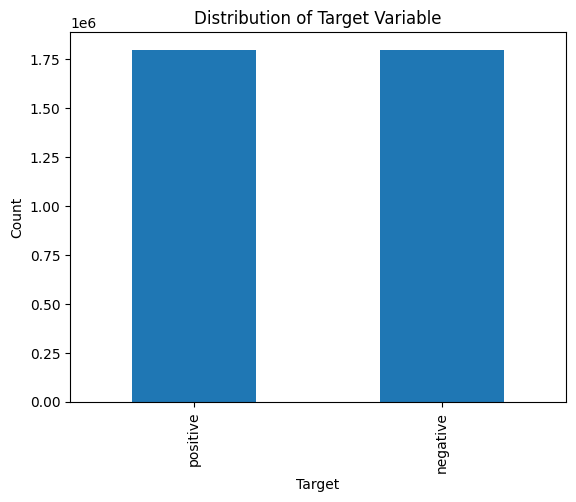

In [3]:
# Assuming 'target' is the name of your target variable column
target_distribution = train_processed_data['polarity_decoded'].value_counts()
# Plot the distribution
ax = target_distribution.plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [4]:
print(target_distribution)

polarity_decoded
positive    1798652
negative    1796171
Name: count, dtype: int64


Printing the word cloud of the reviews.

We use the word cloud to visualize the most frequent words in the tweets. While plotting the word cloud, we use the help of plt.imshow() to display the image of the word cloud.

In [5]:
# Assuming 'sentiment_encoded' is the encoded sentiment column and 'text' is the text column
positive_text = ' '.join(train_processed_data[train_processed_data['polarity'] == 1]['text'])
negative_text = ' '.join(train_processed_data[train_processed_data['polarity'] == 2]['text'])
total_text = ' '.join(train_processed_data['text'])

# Function to generate and display word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

- Total wordcloud of the review

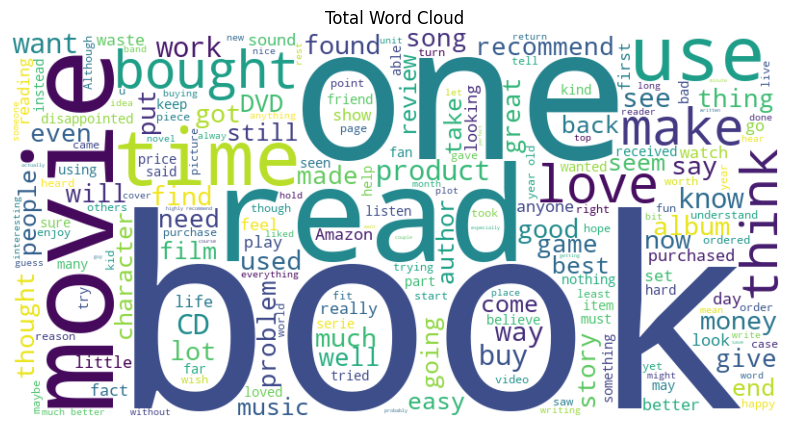

In [6]:
# Generate and display word clouds
generate_wordcloud(total_text, 'Total Word Cloud')

- Word cloud for positive reviews

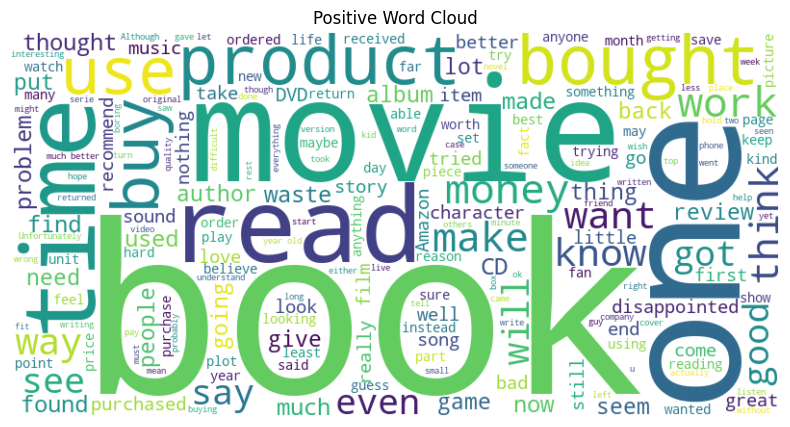

In [7]:
generate_wordcloud(positive_text, 'Positive Word Cloud')

- Word cloud for negative reviews

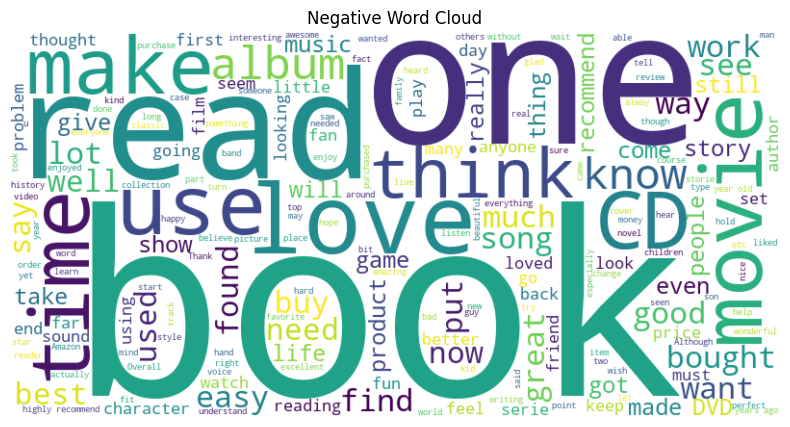

In [8]:
generate_wordcloud(negative_text, 'Negative Word Cloud')

Since the data is large, we will use the TfidfVectorizer to convert the text data into numerical data. Also, since it take a lot of time to display the word cloud for the entire data, we will save the word cloud images into a file.

##### 1.6 Splitting the Data

Since we are already provided with the train and test data, we will not split the data into train and test data.

But for the model selection process we will split the train data into train and validation data. Here we sample 30% of the data from each class for validation.

In [11]:
# Sample 30% from each class
val_sample_data = train_processed_data.groupby('polarity', group_keys=False).apply(lambda x: x.sample(frac=0.1))
val_sample_data.drop(columns=['text','polarity_decoded'],inplace=True)
val_sample_data.to_csv('./train_validation_set.csv',index=False)

C:\Users\ashwi\AppData\Local\Temp\ipykernel_11480\1705070503.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_sample_data = train_processed_data.groupby('polarity', group_keys=False).apply(lambda x: x.sample(frac=0.3))


In [2]:
train_validation_data = pd.read_csv('./train_validation_set.csv')
train_validation_data.dropna(inplace=True)
train_validation_data.head()

,polarity,processed_text
0,1,grammar book unbelievable could make past firs...
1,1,yeah title song may good age plastered mind ag...
2,1,film boring nothing even make giggle le laugh ...
3,1,game current state unplayable period problem a...
4,1,newborn hate gone bjorn carrier time folding t...


In [3]:
train_validation_data.head()

,polarity,processed_text
0,1,grammar book unbelievable could make past firs...
1,1,yeah title song may good age plastered mind ag...
2,1,film boring nothing even make giggle le laugh ...
3,1,game current state unplayable period problem a...
4,1,newborn hate gone bjorn carrier time folding t...


##### 1.7 Model Building

Here we will build the model using the train data and evaluate the model using the validation data. Since the splitting and encoding of text is the almost same for all the models, we will write a function for it.

In [52]:
def get_train_test_data_tfidfVectorizer(m='TfidfVectorizer'):
    # Text preprocessing and feature extraction
    if m=='TfidfVectorizer':
        vectorizer = TfidfVectorizer()
    else:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_validation_data['processed_text'])
    y = train_validation_data['polarity']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

1.7.1 Logistic Regression

In [21]:
X_train, X_test, y_train, y_test = get_train_test_data_tfidfVectorizer()
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87    107765
           2       0.87      0.87      0.87    107924

    accuracy                           0.87    215689
   macro avg       0.87      0.87      0.87    215689
weighted avg       0.87      0.87      0.87    215689



1.7.2 Multinomial Naive Bayes

In [53]:
X_train, X_test, y_train, y_test = get_train_test_data_tfidfVectorizer(m='CountVectorizer')


model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.83      0.82    107765
           2       0.83      0.81      0.82    107924

    accuracy                           0.82    215689
   macro avg       0.82      0.82      0.82    215689
weighted avg       0.82      0.82      0.82    215689



Deciding the number of components to keep after applying TfidfVectorizer and before applying PCA is an important step. The goal is to retain as much variance as possible while reducing the dimensionality of the data. 

1.7.3 Support Vector Machine

On increasing the size of the training data the model performance increases. But, the model takes a lot of time to train. So, we will use alternative models to build the model.

In [9]:
small_train_data = train_validation_data.sample(frac=0.08)
print(len(small_train_data))

86275


In [10]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(small_train_data['processed_text'], small_train_data['polarity'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF with a limited number of features
vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Apply Truncated SVD to reduce dimensionality
svd = TruncatedSVD(n_components=100)  # Adjust n_components as needed
X_train_svd = svd.fit_transform(X_train_tfidf)
X_val_svd = svd.transform(X_val_tfidf)

# Train an SVM model on the reduced feature vectors
svm_model = SVC(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train_svd, y_train)

# Predict and evaluate the model
y_pred = svm_model.predict(X_val_svd)
print("SVM with Truncated SVD Classification Report:")
print(classification_report(y_val, y_pred))

SVM with Truncated SVD Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.80      0.79      8706
           2       0.79      0.78      0.78      8549

    accuracy                           0.79     17255
   macro avg       0.79      0.79      0.79     17255
weighted avg       0.79      0.79      0.79     17255



##### 1.8 Model Evaluation

It looks like you have compared the performance of different classifiers (Multinomial Naive Bayes, Logistic Regression, and SVM) on your dataset. Based on the classification reports, it seems that Logistic Regression is performing the best with an accuracy of 87%, while SVM is taking a lot of time to train.


Summary of Results:

Multinomial Naive Bayes:
- Accuracy: 82%
- Precision, Recall, F1-score: 0.82


Logistic Regression:
- Accuracy: 87%
- Precision, Recall, F1-score: 0.87


SVM with Truncated SVD:
- Accuracy: 79%
- Precision, Recall, F1-score: 0.79
Training Time: High

Given that Logistic Regression is performing well and is faster to train compared to SVM, it might be a good choice for your text classification task.

In [28]:
train_data=pd.read_csv('./train_preprocesed.csv')
train_data.drop(columns=['text','polarity_decoded'],inplace=True)
train_data.dropna(inplace=True)

Since we have preprocessed the test for the train data, we will preprocess the test data in the same way as the train data.

In [23]:
raw_test_data=pd.read_csv('./test_cleaned.csv')
raw_test_data.dropna(inplace=True)
raw_test_data['processed_text'] = raw_test_data['text'].apply(clean_text)

In [24]:
raw_test_data.drop(columns=['text'],inplace=True)
raw_test_data.head()

,polarity,processed_text
0,2,lovely pat one great voice generation listened...
1,2,despite fact played small portion game music h...
2,1,bought charger jul worked ok design nice conve...
3,2,check maha energy website powerex mhcf charger...
4,2,reviewed quite bit combo player hesitant due u...


In [27]:
raw_test_data.to_csv('./test_preprocessed.csv',index=False)
test_data = pd.read_csv('./test_preprocessed.csv')
test_data.dropna(inplace=True)

1.8.1 Logistic Regression

In [30]:
X_train = train_data['processed_text']
y_train = train_data['polarity']
X_test = test_data['processed_text']
y_test = test_data['polarity']

In [31]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_t = vectorizer.transform(X_test)

Since the model didn't converge with the default iteration limit:100. The model's iteration is increased.

In [46]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [36]:
# Predict and evaluate
y_pred = model.predict(X_t)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.87      0.87    199946
           2       0.87      0.88      0.87    199971

    accuracy                           0.87    399917
   macro avg       0.87      0.87      0.87    399917
weighted avg       0.87      0.87      0.87    399917



Last Evaluation using cross-validation

In [39]:
# Create a pipeline with TF-IDF vectorization, feature scaling, and logistic regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),  # Adjust max_features as needed
    ('logreg', LogisticRegression(max_iter=2000, solver='lbfgs'))  # Logistic Regression with increased max_iter
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.82802811 0.83095369 0.83020142 0.83121413 0.83228936]
Mean cross-validation score: 0.8305373417306269


##### 1.9 Conclusion

The cross-validation scores you provided indicate that the logistic regression model has a mean accuracy of approximately 83.05% across different folds. This is a good indication that the model's performance is consistent and not overly dependent on a specific subset of the data.

In [41]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

User testing:-

In [45]:
# Load the saved TF-IDF vectorizer and logistic regression model
with open('tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)
with open('logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

def predict_sentiment(text):
    #the clean_text is defined_above
    cleaned_text = clean_text(text)
    text_tfidf = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_tfidf)
    sentiment_mapping = {1: 'negative', 2: 'positive'}
    return sentiment_mapping[prediction[0]]

user_input = input("Enter a review: ")
#input: i love to play

# Prediction
predicted_sentiment = predict_sentiment(user_input)
print(f"The predicted sentiment is: {predicted_sentiment}")

The predicted sentiment is: positive
